In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
DS_DIR = '../datasets'

In [3]:
# load dataset from csv
df = pd.read_csv(os.path.join(DS_DIR, 'insurance-customer-data.csv'))

df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [4]:
df.tail()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,True,before 2015,True,True,10238,13000.0,sedan,0,0,0,False


In [5]:
df.shape

(10000, 19)

In [6]:
df.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents', 'outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

#### Observation

* There are some entries which have null values
* Columns including null values are credit_score and annual_mileage

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
credit_score,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
postal_code,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
annual_mileage,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
speeding_violations,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIs,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
past_accidents,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


### Missing values and Imputation

In [9]:
# view missing values
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

#### Observation

* credit_score column has 982 and annual_mileage has 957 missing / null values
* Either delete such rows
* Or impute missing values:
    * for credit_score we can impute values with mean based on income group
    * for annual_mileage we can impute values with mean based on driving_experience

In [10]:
# view the mean credit score for each income group
df.groupby('income')['credit_score'].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

#### Observation

* The mean credit_score for each group differ widely
* So, we cannot impute the missing values by mean of credit_score column
* Instead we will impute the credit_score using mean credit score for each income group

In [11]:
def impute_credit_score(df, income_groups):
    '''This method takes a list of income groups and imputes the missing values based on the mean credit score for each income group'''
    for income_group in income_groups:
        mask = df['income'] == income_group
        group_mean = df[df['income'] == income_group]['credit_score'].mean()
        df.loc[mask, 'credit_score'] = df.loc[mask, 'credit_score'].fillna(group_mean)

In [12]:
# impute the missing credit_score values
income_groups = ['middle class', 'poverty', 'upper class', 'working class']
impute_credit_score(df, income_groups)

df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [13]:
# view the mean annual mileage for each driving experience group
df.groupby('driving_experience')['annual_mileage'].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

#### Observation

* The mean annual mileage do not vary widely for each driving experience group
* So, we can impute the missing values using mean of annual_mileage column directly

In [14]:
# impute missing annual_mileage using mean annual mileage
df['annual_mileage'].fillna(df['annual_mileage'].mean(), inplace=True)

df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

### Data clean up

In [16]:
# drop id and postal_code as they are not outcome determining features

df.drop(['id', 'postal_code'], axis=1, inplace=True)

df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,0,1,True


### Data analysis and visualisation

### Univariate analysis

#### Categorical unordered

In [17]:
# explore gender feature
df['gender'].value_counts()

female    5010
male      4990
Name: gender, dtype: int64

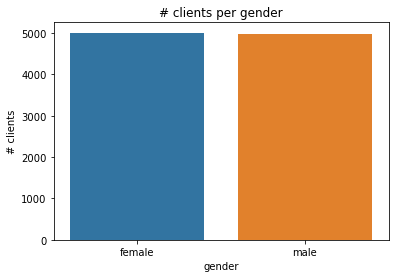

In [18]:
sns.countplot(data=df, x='gender')
plt.title('# clients per gender')
plt.ylabel('# clients')
plt.show()

#### Categorical ordered

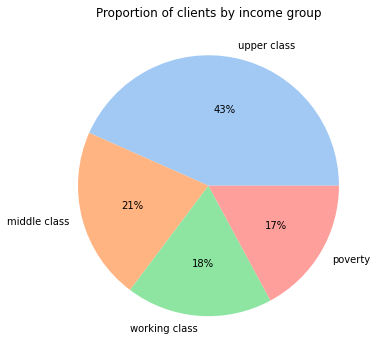

In [20]:
# explore income feature
plt.figure(figsize=(6, 6))

data = df['income'].value_counts(normalize=True)

labels = ['upper class', 'middle class', 'working class', 'poverty']

colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Proportion of clients by income group')
plt.show()

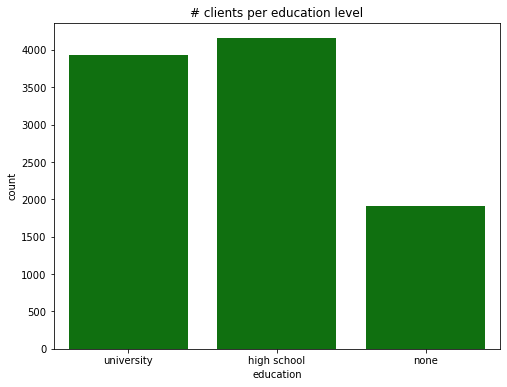

In [22]:
# explore education feature
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education', order=['university', 'high school', 'none'], color='green')
plt.title('# clients per education level')
plt.show()

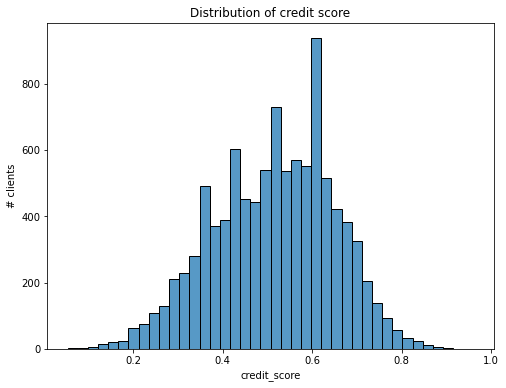

In [23]:
# view distribution of credit score
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='credit_score', bins=40).set(title='Distribution of credit score', ylabel='# clients')
plt.show()

#### Observation

* The credit score follows normal distribution
* The most frequently occuring values are centered near the mean

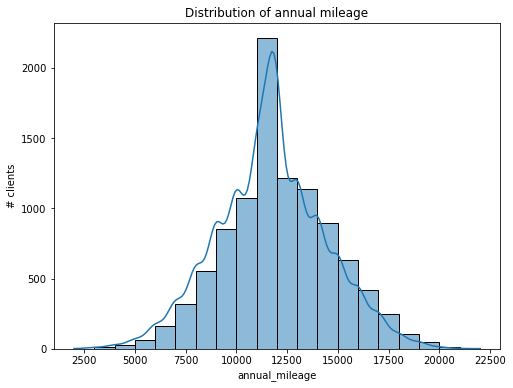

In [24]:
# view distribution of annual mileage
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='annual_mileage', bins=20, kde=True).set(title='Distribution of annual mileage', ylabel='# clients')
plt.show()

#### Observation

* The annual mileage follows normal distribution
* The most frequently occuring values are centered near the mean

### Bivariate analysis

#### Numeric - numeric

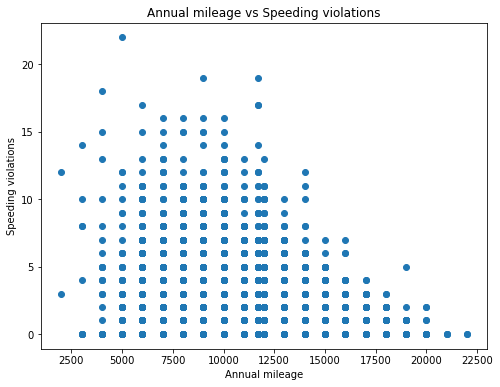

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(data=df, x='annual_mileage', y='speeding_violations')
plt.title('Annual mileage vs Speeding violations')
plt.xlabel('Annual mileage')
plt.ylabel('Speeding violations')
plt.show()

#### Observation

* There is a negative correlation between annual_mileage and speeding_violations
* As the owner drives more distance per year, the fewer speed violations they commit

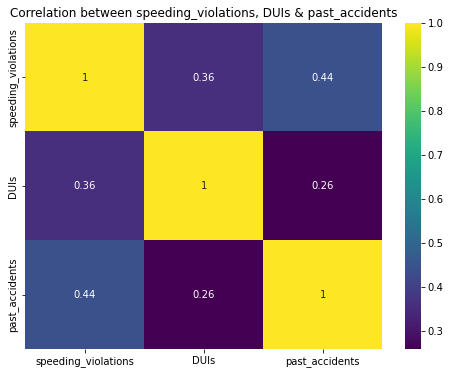

In [27]:
# view correlation between speeding_violations, DUIs & past_accidents
plt.figure(figsize=(8, 6))
corr_matrix = df[["speeding_violations", "DUIs", "past_accidents"]].corr()
sns.heatmap(data=corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation between speeding_violations, DUIs & past_accidents')
plt.show()

### Numerical - Categorical

In [28]:
# view the mean annual mileage per category in the outcome column
# group by “outcome” and then calculate the mean “annual_mileage” for each group

df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

#### Observation

* we can better visualize the difference in dispersion or variability between two variables by using box plots. Box plots display a five-number summary of a set of data; the minimum, first quartile, median, third quartile, and maximum.

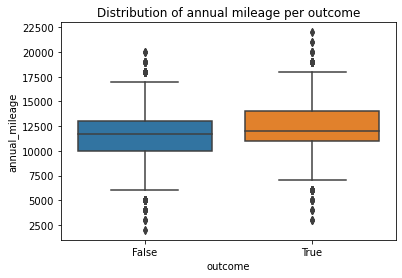

In [29]:
sns.boxplot(data=df, y='annual_mileage', x='outcome')
plt.title('Distribution of annual mileage per outcome')
plt.show()

#### Observation

* Both variables have similar medians though clients who made a claim have slightly higher median annual mileage than clients who didn’t. 

* The same can be said for the first and third quartiles (denoted by the lower and upper borders of the box respectively).

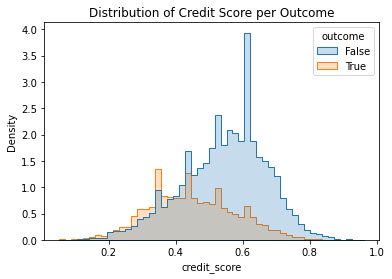

In [30]:
# view distribution of credit score based on outcome
# use bivariate histogram
sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

#### Categorical - Categorical

In [31]:
# explore how outcome feature relates to age and vehical year

# create a new feature claim_rate
# convert boolean to 0 1 under outcome column, it allows to calculate the claim rate for any group of clients

df['claim_rate'] = np.where(df['outcome'] == True, 1, 0)
df['claim_rate'].value_counts()

0    6867
1    3133
Name: claim_rate, dtype: int64

#### Observation

* Half the number of clients made claim in past year compared to those who didn't

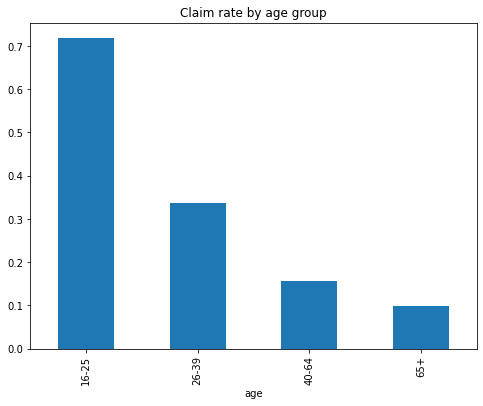

In [32]:
# plot the avg claim rate per age group
plt.figure(figsize=(8, 6))
df.groupby('age')['claim_rate'].mean().plot(kind='bar')
plt.title('Claim rate by age group')
plt.show()

#### Observation

* Younger people are more likely to make an insurance claim

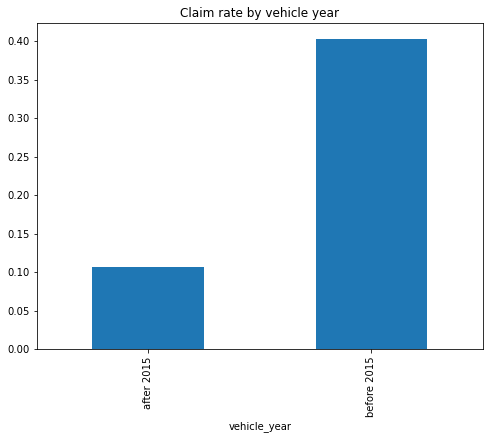

In [34]:
# plot the avg claim rate per vehicle year
plt.figure(figsize=(8, 6))
df.groupby('vehicle_year')['claim_rate'].mean().plot(kind='bar')
plt.title('Claim rate by vehicle year')
plt.show()


#### Observation

* Insurance claims are more likely to happen for older vehicles

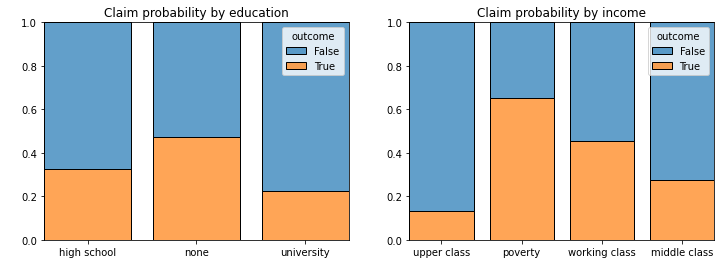

In [35]:
# visualise claim rate based on imcome group and education
# used probability graphs

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# plot two probability graphs for education and income
for i, col in enumerate(['education', 'income']):
    sns.histplot(df, ax=axes[i], x=col, hue='outcome', stat='probability', multiple='fill', shrink=0.8, alpha=0.7)
    axes[i].set(title=f'Claim probability by {col}', ylabel=' ', xlabel=' ')

#### Observation

* Clients with no education are more likely to file claims
* Clients within poverty income group are more likely to file claims followed by those in working class and middle class in that order

### Multivariate analysis

In [38]:
# to understand relationship between features like education and income with avg claim rates
# create a pivot table and then a heatmap

education_income = pd.pivot_table(data=df, index='education', columns='income', values='claim_rate', aggfunc='mean')
education_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


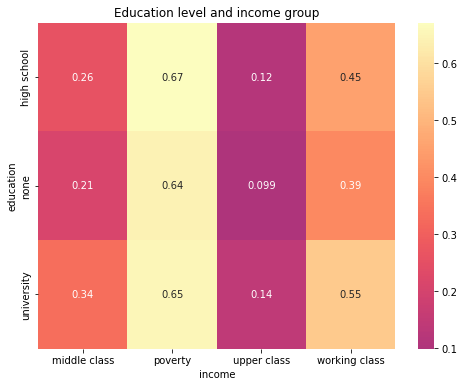

In [39]:
# visualise using heatmap the relation between education, income and avg claim rate
plt.figure(figsize=(8, 6))
sns.heatmap(education_income, annot=True, cmap='magma', center=0.117)
plt.title('Education level and income group')
plt.show()

#### Observation

* High school graduates in poverty income group have highest claim rates
* followed by university graduates in poverty income group
* Clients in upper income group with no education have lowest claim rate

In [40]:
# to understand relationship between features like driving_experience and marital status with avg claim rates
# create a pivot table and then a heatmap

driving_married = pd.pivot_table(data=df, index='driving_experience', columns='married', values='claim_rate', aggfunc='mean')
driving_married

married,False,True
driving_experience,,
0-9y,0.697981,0.500799
10-19y,0.307018,0.164884
20-29y,0.068742,0.041543
30y+,0.046332,0.010088


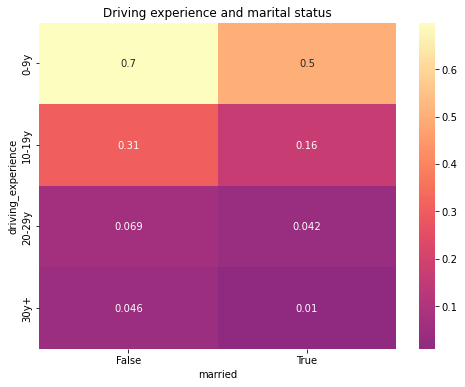

In [41]:
# visualise using heatmap the relation between driving_experience and marital status with avg claim rates
plt.figure(figsize=(8, 6))
sns.heatmap(driving_married, annot=True, cmap='magma', center=0.117)
plt.title('Driving experience and marital status')
plt.show()

#### Observation

* Unmarried clients with 0-9 yrs of driving experience are most likely to file claims
* Married clients with 30+ yrs of driving experience are least likely to file claims

In [42]:
# to understand relationship between features like gender and family status with avg claim rates
# create a pivot table and then a heatmap

gender_children = pd.pivot_table(data=df, index='gender', columns='children', values='claim_rate', aggfunc='mean')
gender_children

children,False,True
gender,,
female,0.420476,0.193231
male,0.527261,0.288546


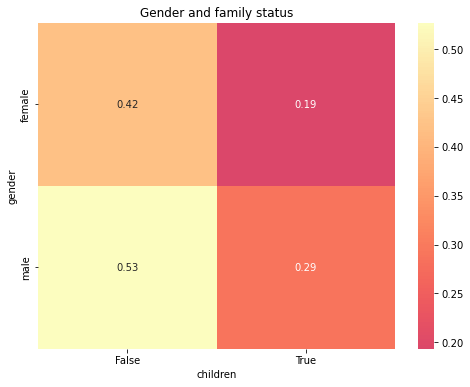

In [43]:
# visualise using heatmap the relation between gender and family status with avg claim rates
plt.figure(figsize=(8, 6))
sns.heatmap(gender_children, annot=True, cmap='magma', center=0.117)
plt.title('Gender and family status')
plt.show()

#### Observation

* Men without children are most likely to file a claim
* Women with children are least likely to file a claim

In [44]:
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,claim_rate
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,0,0,False,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,0,0,True,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,0,0,False,0
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,0,0,False,0
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,0,1,True,1


In [45]:
df = df.drop(['claim_rate'], axis=1)

In [46]:
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,0,1,True


In [48]:
# save dataframe for training
df.to_csv(os.path.join(DS_DIR, 'train-insurance-customer.csv'), index=False)